# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 572


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]


        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port mathurin
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | jayapura
Processing Record 4 of Set 1 | uturoa
Processing Record 5 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | port elizabeth
Processing Record 8 of Set 1 | ishqoshim
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | bodo
Processing Record 12 of Set 1 | tiksi
Processing Record 13 of Set 1 | alta
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | waitangi
Processing Record 16 of Set 1 | pisco
Processing Record 17 of Set 1 | avarua
Processing Record 18 of Set 1 | polovinnoye
Processing Record 19 of Set 1 | nieuw amsterdam
Processing Record 20 of Set 1 | kolwezi
Processing Record 21 of Set 1 | rikaze
Processing Record 22 of Set 1 | talnakh
Processing

Processing Record 42 of Set 4 | keflavik
Processing Record 43 of Set 4 | macapa
Processing Record 44 of Set 4 | cheremukhovo
Processing Record 45 of Set 4 | corowa
Processing Record 46 of Set 4 | la passe
Processing Record 47 of Set 4 | singkil
Processing Record 48 of Set 4 | el haouaria
Processing Record 49 of Set 4 | alzamay
Processing Record 0 of Set 5 | ust-tsilma
Processing Record 1 of Set 5 | oras
Processing Record 2 of Set 5 | umluj
Processing Record 3 of Set 5 | san nicolas de los arroyos
Processing Record 4 of Set 5 | rio grande
Processing Record 5 of Set 5 | kiunga
Processing Record 6 of Set 5 | wakkanai
Processing Record 7 of Set 5 | ilulissat
Processing Record 8 of Set 5 | mendoza
Processing Record 9 of Set 5 | roccella ionica
Processing Record 10 of Set 5 | aykhal
Processing Record 11 of Set 5 | conde
Processing Record 12 of Set 5 | dunedin
Processing Record 13 of Set 5 | moose jaw
Processing Record 14 of Set 5 | badger
Processing Record 15 of Set 5 | yulinshi
Processing R

Processing Record 33 of Set 8 | kimbe
Processing Record 34 of Set 8 | nileshwar
Processing Record 35 of Set 8 | kiffa
Processing Record 36 of Set 8 | el idrissia
Processing Record 37 of Set 8 | kasongo-lunda
Processing Record 38 of Set 8 | paungde
Processing Record 39 of Set 8 | santa ana
Processing Record 40 of Set 8 | paris
Processing Record 41 of Set 8 | zemio
Processing Record 42 of Set 8 | la sarre
Processing Record 43 of Set 8 | poshekhon'ye
Processing Record 44 of Set 8 | mbandaka
Processing Record 45 of Set 8 | vadso
Processing Record 46 of Set 8 | kapuskasing
Processing Record 47 of Set 8 | kutahya
Processing Record 48 of Set 8 | isle of lewis
City not found. Skipping...
Processing Record 49 of Set 8 | gadzhiyevo
Processing Record 0 of Set 9 | nizhniy kuranakh
Processing Record 1 of Set 9 | swift current
Processing Record 2 of Set 9 | hammerfest
Processing Record 3 of Set 9 | cam ranh
Processing Record 4 of Set 9 | bamboo flat
Processing Record 5 of Set 9 | kegeyli shahar
Proc

Processing Record 20 of Set 12 | jeddah
Processing Record 21 of Set 12 | rumbek
-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port mathurin,-19.6833,63.4167,71.58,77,73,20.00,MU,1695606273
1,adamstown,-25.0660,-130.1015,68.90,76,100,27.49,PN,1695606262
2,jayapura,-2.5333,140.7000,87.19,76,94,4.90,ID,1695606407
3,uturoa,-16.7333,-151.4333,74.23,74,100,24.94,PF,1695606286
4,albany,42.6001,-73.9662,57.85,85,100,2.82,US,1695606065


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,71.58,77,73,20.00,MU,1695606273
1,adamstown,-25.0660,-130.1015,68.90,76,100,27.49,PN,1695606262
2,jayapura,-2.5333,140.7000,87.19,76,94,4.90,ID,1695606407
3,uturoa,-16.7333,-151.4333,74.23,74,100,24.94,PF,1695606286
4,albany,42.6001,-73.9662,57.85,85,100,2.82,US,1695606065


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

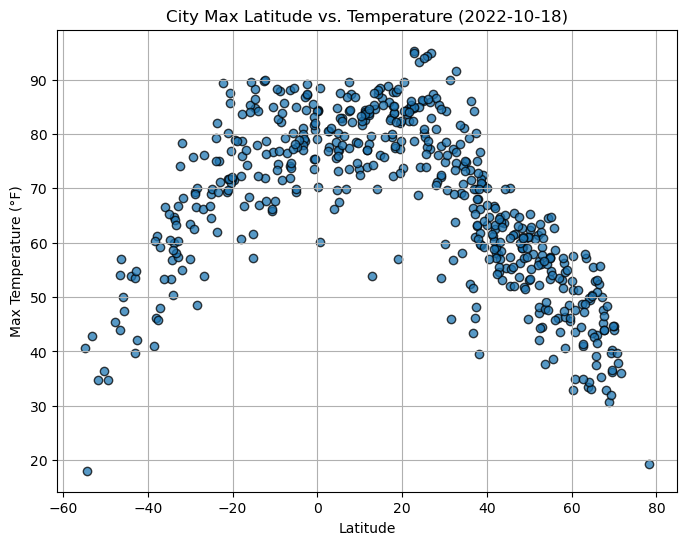

In [9]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

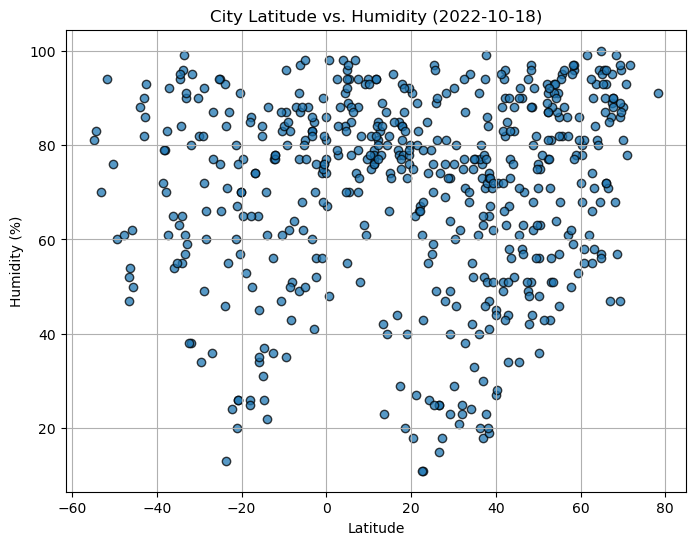

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

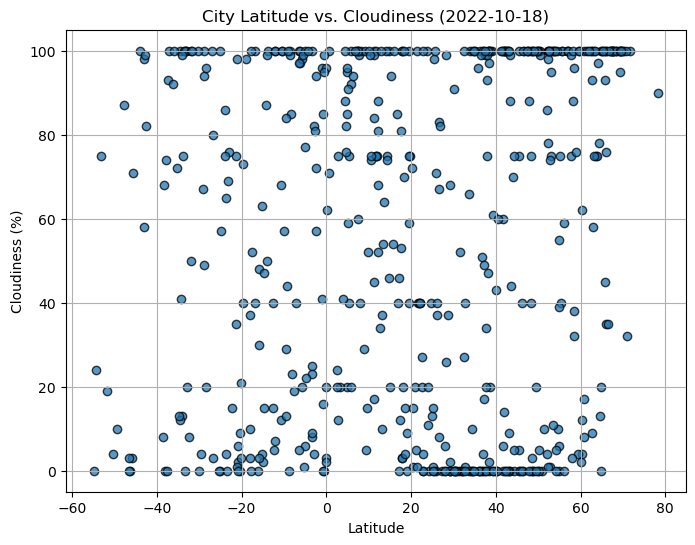

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

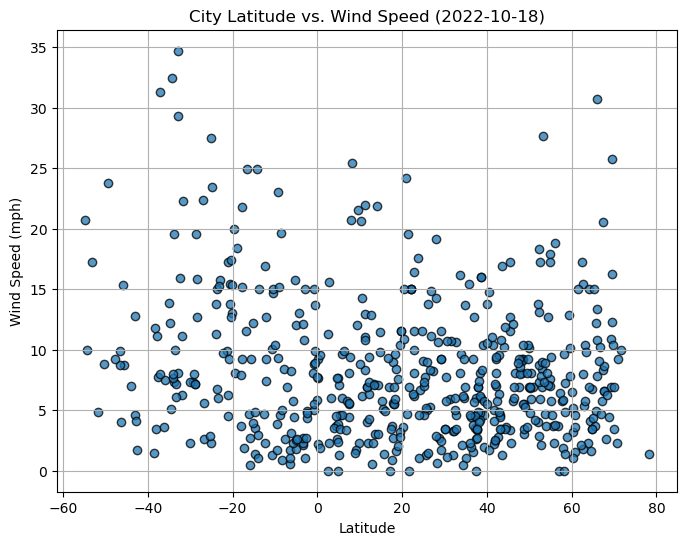

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
#new
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept

    # Create line equation string
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create scatter plot
    plt.scatter(x_values, y_values)

    # Plot regression line
    plt.plot(x_values, regress_values, "r-")

    # Add the line equation text to the plot
    plt.text(text_coordinates[0], text_coordinates[1]-10, line_eq, fontsize=15, color="red")

    # Print r-squared value
    print(f"R-squared: {rvalue**2}")

    # Show plot
    plt.show()

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,albany,42.6001,-73.9662,57.85,85,100,2.82,US,1695606065
6,ishqoshim,36.7248,71.6133,43.36,76,51,1.52,TJ,1695606407
9,bodo,67.2800,14.4050,50.04,86,100,5.75,NO,1695606408
10,tiksi,71.6872,128.8694,36.09,97,100,9.93,RU,1695606268
11,alta,69.9689,23.2717,43.86,88,100,3.44,NO,1695606263


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port mathurin,-19.6833,63.4167,71.58,77,73,20.00,MU,1695606273
1,adamstown,-25.0660,-130.1015,68.90,76,100,27.49,PN,1695606262
2,jayapura,-2.5333,140.7000,87.19,76,94,4.90,ID,1695606407
3,uturoa,-16.7333,-151.4333,74.23,74,100,24.94,PF,1695606286
5,port elizabeth,-33.9180,25.5701,64.69,96,75,19.57,ZA,1695606267


###  Temperature vs. Latitude Linear Regression Plot

R-squared: 0.7033451143211282


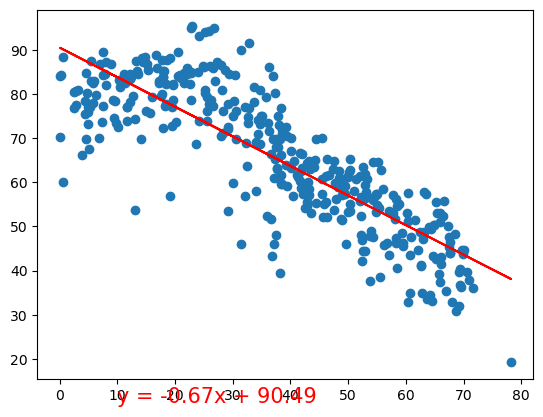

In [16]:
# Linear regression on Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern_temp = northern_hemi_df["Max Temp"]
plot_linear_regression(x_values_northern, y_values_northern_temp, "Linear Regression on Northern Hemisphere for Max Temp", (10, 20))

R-squared: 0.668374376263128


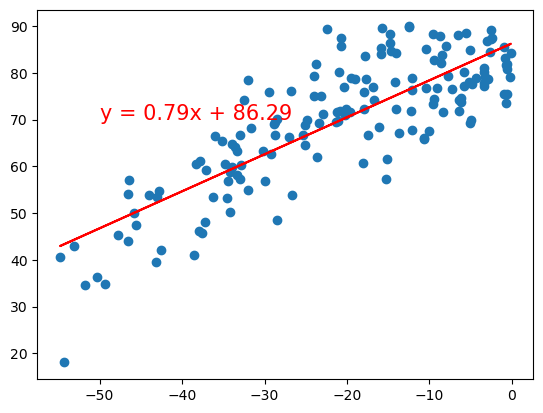

In [17]:
# Linear regression on Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern_temp = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values_southern, y_values_southern_temp, "Linear Regression on Southern Hemisphere for Max Temp", (-50, 80))

**Discussion about the linear relationship:** 

For Northern hemisphere, there is an inverse relationship between latitude and maximum temparater. As the latitude increase (move northward), the maximum temperature tends to decrease.

For Southern hemisphere, there is an direct relationship between latitude and maximum temparater. As the latitude decrease (move southward), the maximum temperature tends to increase.

### Humidity vs. Latitude Linear Regression Plot

R-squared: 0.0030837825843865276


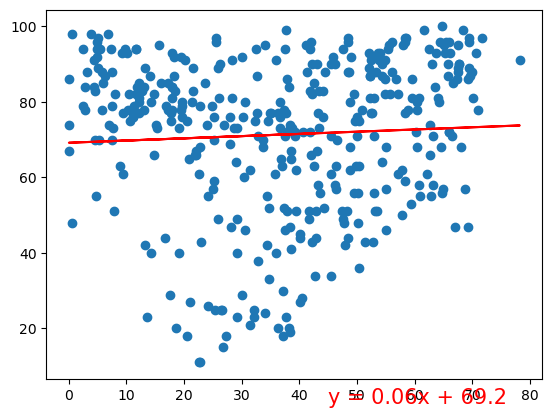

In [18]:
# Northern Hemisphere
x_values_northern_humidity = northern_hemi_df["Lat"]
y_values_northern_humidity = northern_hemi_df["Humidity"]
plot_linear_regression(x_values_northern_humidity, y_values_northern_humidity, "Linear Regression on Northern Hemisphere for Humidity", (45, 10))

R-squared: 0.000510203730686549


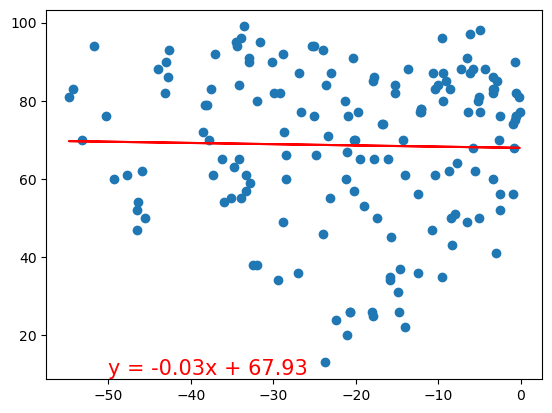

In [19]:
# Southern Hemisphere
x_values_southern_humidity = southern_hemi_df["Lat"]
y_values_southern_humidity = southern_hemi_df["Humidity"]
plot_linear_regression(x_values_southern_humidity, y_values_southern_humidity, "Linear Regression on Southern Hemisphere for Humidity", (-50, 20))

**Discussion about the linear relationship:** 

For Northern hemisphere, there is an weak positive relationship between latitude and maximum temparater. As the latitude increase (move northward), the humidity tends to slightly increase.

For Southern hemisphere, there is an weak negative relationship between latitude and maximum temparater. As the latitude decrease (move southward), the humidity tends to slightly decrease.

### Cloudiness vs. Latitude Linear Regression Plot

R-squared: 0.016428542359496593


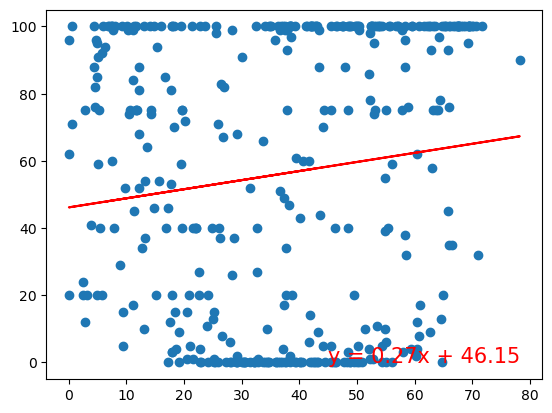

In [20]:
# Northern Hemisphere
x_values_northern_cloudiness = northern_hemi_df["Lat"]
y_values_northern_cloudiness = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values_northern_cloudiness, y_values_northern_cloudiness, "Linear Regression on Northern Hemisphere for Cloudiness", (45, 10))

R-squared: 0.0010246685882068082


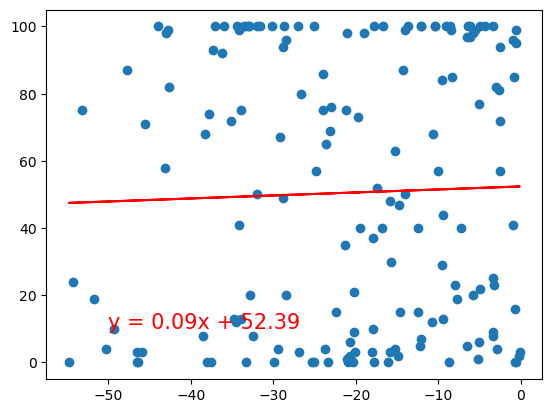

In [21]:
# Southern Hemisphere
x_values_southern_cloudiness = southern_hemi_df["Lat"]
y_values_southern_cloudiness = southern_hemi_df["Cloudiness"]
plot_linear_regression(x_values_southern_cloudiness, y_values_southern_cloudiness, "Linear Regression on Southern Hemisphere for Cloudiness", (-50, 20))

**Discussion about the linear relationship:** 

For Northern hemisphere, there is an weak positive relationship between latitude and maximum temparater. As the latitude increase (move northward), the cloudiness tends to slightly increase.

For Southern hemisphere, there is an weak positive relationship between latitude and maximum temparater. As the latitude decrease (move southward), the cloudiness tends to slightly increase.

### Wind Speed vs. Latitude Linear Regression Plot

R-squared: 0.0019768969602281376


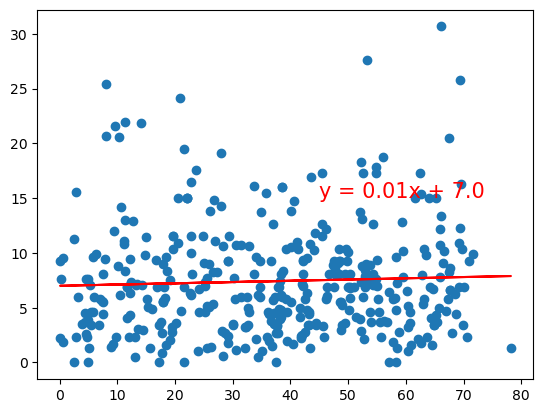

In [22]:
# Northern Hemisphere
x_values_northern_wind = northern_hemi_df["Lat"]
y_values_northern_wind = northern_hemi_df["Wind Speed"]
plot_linear_regression(x_values_northern_wind, y_values_northern_wind, "Linear Regression on Northern Hemisphere for Wind Speed", (45, 25))

R-squared: 0.05126393614132396


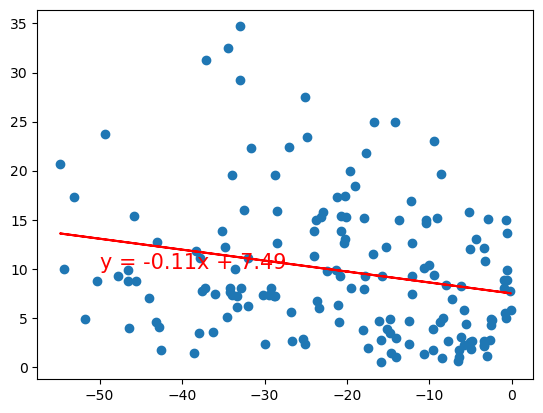

In [23]:
# Southern Hemisphere
x_values_southern_wind = southern_hemi_df["Lat"]
y_values_southern_wind = southern_hemi_df["Wind Speed"]
plot_linear_regression(x_values_southern_wind, y_values_southern_wind, "Linear Regression on Southern Hemisphere for Wind Speed", (-50, 20))

**Discussion about the linear relationship:** 

For Northern hemisphere, there is an weak positive relationship between latitude and maximum temparater. As the latitude increase (move northward), the wind speed tends to slightly increase.

For Southern hemisphere, there is an weak negative relationship between latitude and maximum temparater. As the latitude decrease (move southward), the wind speed tends to slightly decrease.